In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [4]:
imgFile = 'shapes3.png'
rawImg = cv.imread(imgFile)
gry = cv.cvtColor(rawImg, cv.COLOR_BGR2GRAY)
ret, threshImg = cv.threshold(gry, 50, 255, cv.THRESH_BINARY)
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

In [6]:
imgApproxPolyDP = rawImg.copy()
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.01 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

    color = (0, 255, 255)
    thickness = 5
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
    color = (255, 0, 0)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        print("contour:", approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)

    # determine shape
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, "Triangle")
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        print(aspectRatio)
        if 0.90 < aspectRatio < 1.1:
            vertice_shape = (verticeNumber, "Square")
        else:
            vertice_shape = (verticeNumber, "Rectangle")
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, "Pentagon")
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, "Hexagon")
    elif verticeNumber == 7:
        vertice_shape = (verticeNumber, "Heptagon")
    elif verticeNumber == 8:
        vertice_shape = (verticeNumber, "Octagon")
    elif verticeNumber == 9:
        vertice_shape = (verticeNumber, "Nonagon")
    elif verticeNumber == 10:
        vertice_shape = (verticeNumber, "Decagon")
    else:
        vertice_shape = (verticeNumber, "Circle")

    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Get the position to draw:
    text = vertice_shape[1]+
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 2
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)

    # Write the ordering of the shape on the center of shapes
    color = (0,0,0)
    result = cv.putText(
        imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness
    )

contour: (14, 1, 2) (14, 2)
contour: (16, 1, 2) (16, 2)


In [8]:
verticeNumber = len(approxPolyDP)
if verticeNumber == 3:
    vertice_shape = (verticeNumber, "Triangle")
elif verticeNumber == 4:
    # get aspect ratio
    x, y, width, height = cv.boundingRect(approxPolyDP)
    aspectRatio = float(width) / height
    print(aspectRatio)
    if 0.90 < aspectRatio < 1.1:
        vertice_shape = (verticeNumber, "Square")
    else:
        vertice_shape = (verticeNumber, "Rectangle")
elif verticeNumber == 5:
    vertice_shape = (verticeNumber, "Pentagon")
elif verticeNumber == 6:
    vertice_shape = (verticeNumber, "Hexagon")
elif verticeNumber == 7:
    vertice_shape = (verticeNumber, "Heptagon")
elif verticeNumber == 8:
    vertice_shape = (verticeNumber, "Octagon")
elif verticeNumber == 9:
    vertice_shape = (verticeNumber, "Nonagon")
elif verticeNumber == 10:
    vertice_shape = (verticeNumber, "Decagon")
else:
    vertice_shape = (verticeNumber, "Circle")

In [12]:
contours_sizes = [cv.contourArea(contour) for contour in contours]
contours_sizes

[4636.0, 37004.0]

In [18]:
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list, key=lambda x: x[0])
for i, (size, contour) in enumerate(sorted_size_shape_list):

    imgApproxPolyDP = rawImg.copy()
    for contour in contours:
        perimeter = cv.arcLength(contour, True)
        epsilon = 0.01 * perimeter
        approxPolyDP = cv.approxPolyDP(contour, epsilon, True)

        color = (0, 255, 255)
        thickness = 5
        # draw line
        for approx in approxPolyDP:
            cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
        color = (255, 0, 0)
        thickness = 5
        # draw points
        for approx in [approxPolyDP]:
            # draw points
            squeeze = np.squeeze(approx)
            print("contour:", approx.shape, squeeze.shape)
            for p in squeeze:
                pp = tuple(p.reshape(1, -1)[0])
                cv.circle(imgApproxPolyDP, pp, 10, color, -1)

        # determine shape
        verticeNumber = len(approxPolyDP)
        if verticeNumber == 3:
            vertice_shape = (verticeNumber, "Triangle")
        elif verticeNumber == 4:
            # get aspect ratio
            x, y, width, height = cv.boundingRect(approxPolyDP)
            aspectRatio = float(width) / height
            print(aspectRatio)
            if 0.90 < aspectRatio < 1.1:
                vertice_shape = (verticeNumber, "Square")
            else:
                vertice_shape = (verticeNumber, "Rectangle")
        elif verticeNumber == 5:
            vertice_shape = (verticeNumber, "Pentagon")
        elif verticeNumber == 6:
            vertice_shape = (verticeNumber, "Hexagon")
        elif verticeNumber == 7:
            vertice_shape = (verticeNumber, "Heptagon")
        elif verticeNumber == 8:
            vertice_shape = (verticeNumber, "Octagon")
        elif verticeNumber == 9:
            vertice_shape = (verticeNumber, "Nonagon")
        elif verticeNumber == 10:
            vertice_shape = (verticeNumber, "Decagon")
        else:
            vertice_shape = (verticeNumber, "Circle")

        # write shape
        # Compute the moment of contour:
        M = cv.moments(contour)

        # The center or centroid can be calculated as follows:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Get the position to draw:
        text = vertice_shape[1]+str(i)
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        thickness = 2
        text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

        text_x = cX - text_size[0] / 2
        text_x = round(text_x)
        text_y = cY + text_size[1] / 2
        text_y = round(text_y)

        # Write the ordering of the shape on the center of shapes
        color = (0,0,0)
        result = cv.putText(
            imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness
)

contour: (14, 1, 2) (14, 2)
contour: (16, 1, 2) (16, 2)
contour: (14, 1, 2) (14, 2)
contour: (16, 1, 2) (16, 2)


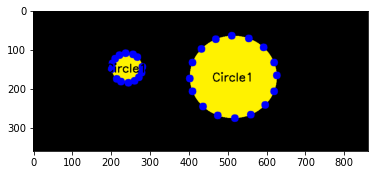

In [19]:
imgRGB = result[:,:,::-1]
plt.imshow(imgRGB)
plt.show()